# Part 1: Working with Regex

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import re

## Opening receipts.txt

In [2]:
receipts_dict = {
                'Receipt_Number': [], 
                'date':[], 
                'quantity':[], 
                'amount_€':[]
                }

In [3]:
with open('data/receipts.txt', encoding="utf-8") as doc:
    receipts_text = doc.read();
    receipts_list = receipts_text.split('\n\n====================================\n************************************\n\n\n')
    
    for index,element in enumerate(receipts_list[::]):
#         print(f"""
# _{index+1}
# {element}
# """)
        Receipt_Number_pattern = r"Receipt Number +(\d{6})"
        receipts_dict['Receipt_Number'].append(re.findall(Receipt_Number_pattern, element)[0])
        
        date_pattern = r"\d{2}-\d{2}-\d{4}"
        receipts_dict['date'].append(re.findall(date_pattern, element)[0])
        
        quantity_pattern = r"Quantity +(\d+)"
        receipts_dict['quantity'].append(re.findall(quantity_pattern, element)[0])
        
        amount_group_pattern = r"Total Amount +(\d+.\d{2}) €"
        receipts_dict['amount_€'].append(re.findall(amount_group_pattern, element)[0])



# receipts_dict

In [4]:
receipts_df = pd.DataFrame.from_dict(receipts_dict)
receipts_df.index += 1

display(receipts_df.tail())
receipts_df.shape

,Receipt_Number,date,quantity,amount_€
96,106598,09-10-2017,121,1936.00
97,106648,12-10-2017,179,4743.50
98,106839,26-10-2017,108,2484.00
99,107482,12-12-2017,193,2605.50
100,107538,15-12-2017,148,1850.00


(100, 4)

In [5]:
receipts_df.dtypes

Receipt_Number    object
date              object
quantity          object
amount_€          object
dtype: object

# Part 3: Data Visualization

In [7]:
receipts_df["date"] = pd.to_datetime(receipts_df['date'])
receipts_df['amount_€'] = pd.to_numeric(receipts_df['amount_€'])
receipts_df.dtypes

Receipt_Number            object
date              datetime64[ns]
quantity                  object
amount_€                 float64
dtype: object

In [13]:
prices_evolution_df = receipts_df[["date", 'amount_€']]
prices_evolution_df.set_index('date', inplace=True)
prices_evolution_df.head()

,amount_€
date,
2017-02-01,3097.0
2017-05-01,935.0
2017-01-23,2808.0
2017-01-31,4368.0
2017-06-02,1988.5


<AxesSubplot:xlabel='date', ylabel='amount €'>

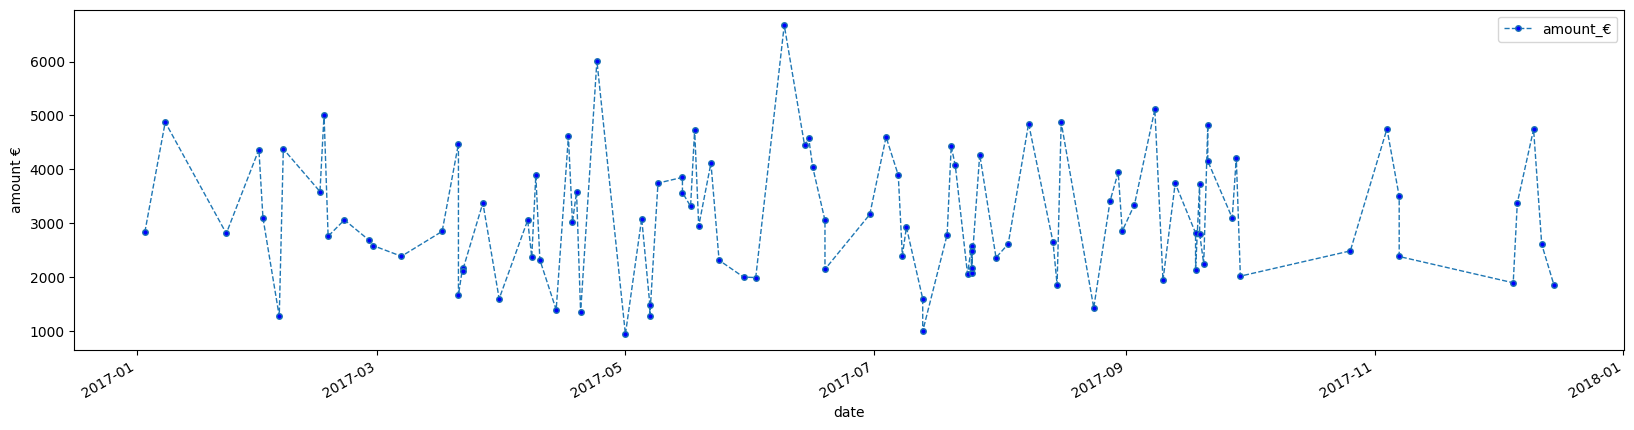

In [51]:
prices_evolution_df.iloc[:].plot(
                        #Graph design
                        figsize=(20,5),
                        ylabel = "amount €",                        
                        # Line design
                        linestyle="--", 
                        linewidth=1, 
                        marker="o", 
                        markersize=4, 
                        markerfacecolor="blue"
                        )